In [1]:
# %%
# === 1) Import libraries ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# %%
# === 2) Generate synthetic dataset ===

np.random.seed(42)

n_records = 1000

# sales (in £), daily revenue
sales = np.random.normal(loc=1200, scale=300, size=n_records).round(2)

# cost of goods sold (COGS)
cogs = (sales * np.random.uniform(0.4, 0.7, n_records)).round(2)

# profit calculated from sales − cost
profit = (sales - cogs).round(2)

# profit margin as percentage
profit_margin = ((profit / sales) * 100).round(1)

# restaurant branch
branches = np.random.choice(["Curry House Central", "Curry House West End", "Curry House Shoreditch"], size=n_records)

# customer demographic: gender, age group
gender = np.random.choice(["Male", "Female", "Other"], size=n_records, p=[0.48, 0.48, 0.04])
age_groups = np.random.choice(["18–25", "26–35", "36–45", "46–55", "56+"], size=n_records)

# date
dates = pd.date_range(start="2025-01-01", periods=n_records, freq="D")

# Create DataFrame
df_restaurants = pd.DataFrame({
    "Date": dates,
    "Branch": branches,
    "Sales_£": sales,
    "COGS_£": cogs,
    "Profit_£": profit,
    "Profit_Margin_%": profit_margin,
    "Customer_Gender": gender,
    "Customer_Age_Group": age_groups
})

df_restaurants.head()

,Date,Branch,Sales_£,COGS_£,Profit_£,Profit_Margin_%,Customer_Gender,Customer_Age_Group
0,2025-01-01,Curry House West End,1349.01,607.38,741.63,55.0,Male,36–45
1,2025-01-02,Curry House Shoreditch,1158.52,499.75,658.77,56.9,Male,36–45
2,2025-01-03,Curry House Central,1394.31,823.94,570.37,40.9,Male,18–25
3,2025-01-04,Curry House West End,1656.91,1013.93,642.98,38.8,Male,36–45
4,2025-01-05,Curry House Shoreditch,1129.75,462.61,667.14,59.1,Female,26–35


In [3]:
# Summary
df_restaurants.describe()

,Date,Sales_£,COGS_£,Profit_£,Profit_Margin_%
count,1000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2026-05-15 12:00:00,1205.799680,665.114390,540.685290,44.891300
min,2025-01-01 00:00:00,227.620000,148.400000,79.220000,30.000000
25%,2025-09-07 18:00:00,1005.725000,521.560000,421.150000,37.600000
50%,2026-05-15 12:00:00,1207.590000,653.080000,517.025000,44.500000
75%,2027-01-20 06:00:00,1394.385000,794.907500,642.897500,52.600000
max,2027-09-27 00:00:00,2355.820000,1350.800000,1131.630000,59.900000
std,NaN,293.764887,195.799337,168.270621,8.650328


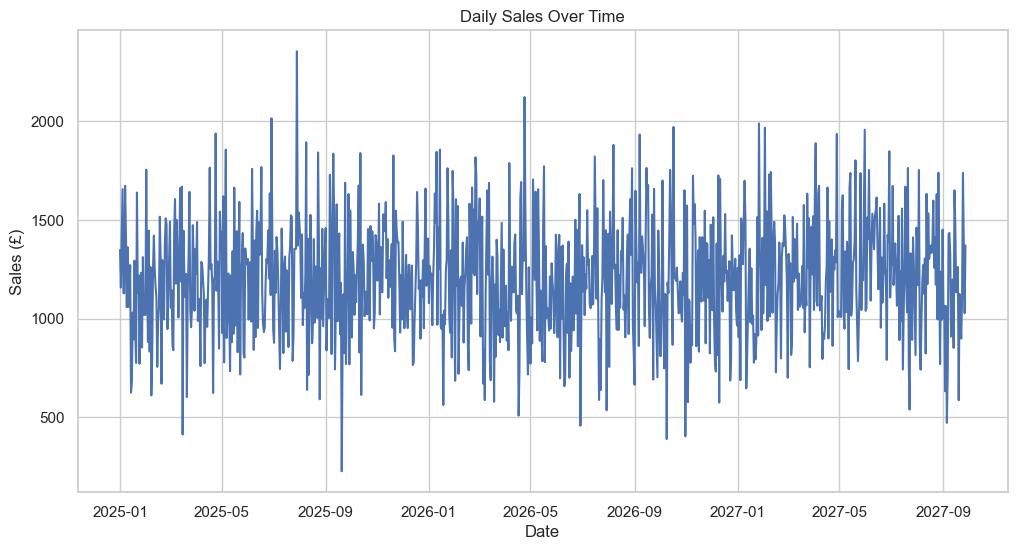

In [4]:
# daily sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Sales_£", data=df_restaurants)
plt.title("Daily Sales Over Time")
plt.ylabel("Sales (£)")
plt.xlabel("Date")
plt.show()

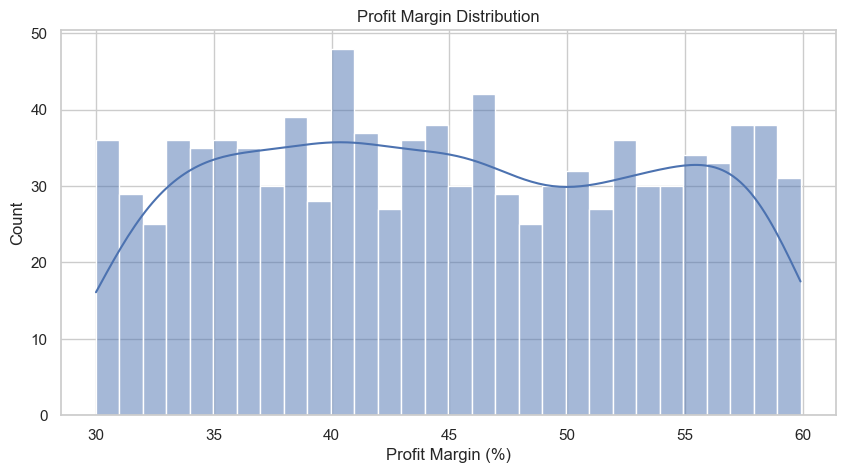

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df_restaurants["Profit_Margin_%"], bins=30, kde=True)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin (%)")
plt.show()

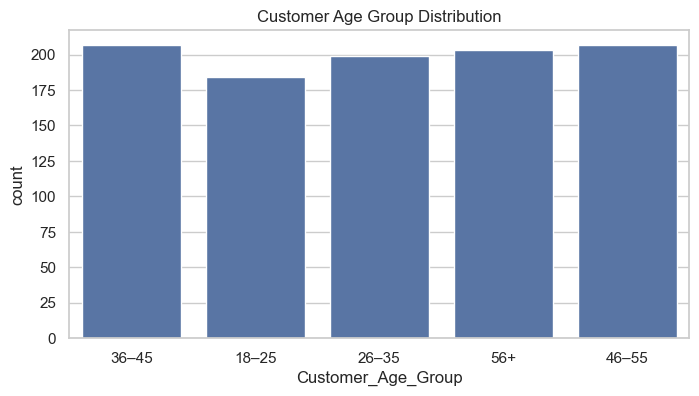

In [6]:
# age group count
plt.figure(figsize=(8,4))
sns.countplot(x="Customer_Age_Group", data=df_restaurants)
plt.title("Customer Age Group Distribution")
plt.show()

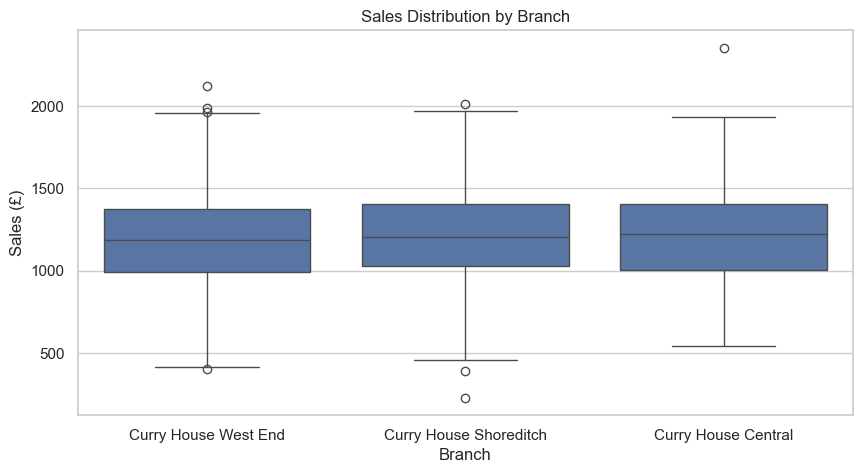

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Branch", y="Sales_£", data=df_restaurants)
plt.title("Sales Distribution by Branch")
plt.ylabel("Sales (£)")
plt.show()

In [8]:
df_restaurants.to_csv("curry_house_sales_demographics.csv", index=False)